# Лабораторная работа №1

In [267]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import re
from matplotlib.lines import Line2D
%matplotlib inline

In [268]:
matplotlib.style.use('ggplot')

## 1.	Загрузите данные в ноутбук

In [269]:
df=pd.read_excel('/Users/ekaterinakotova/Desktop/2 семестр/МО/sem2/data/Вариант 3.xlsx', header=2)
df.head(10)

,№,№ школы,Класс,Пол,Номер варианта,Задания с кратким ответом,Задания с развёрнутым ответом,Устная часть,Первичный балл,Балл,Минимальный балл
0,1.0,152.0,11,М,333.0,----001---00---000--1-+0---,0(3)0(3)0(3)0(3)0(3),NaN,3.0,10.0,36.0
1,2.0,140.0,12,Ж,332.0,----100---01-+-000--0--1---,0(3)0(3)0(3)0(3)0(3),NaN,4.0,14.0,36.0
2,3.0,137.0,11,М,328.0,--+-010---00---101--0--1---,0(3)0(3)0(3)0(3)0(3),NaN,5.0,17.0,36.0
3,4.0,148.0,11,М,333.0,-+--000--+01---100--0--1---,0(3)0(3)0(3)0(3)0(3),NaN,5.0,17.0,36.0
4,5.0,153.0,11,Ж,333.0,-+--100---00---100-+0--1---,0(3)0(3)0(3)0(3)0(3),NaN,5.0,17.0,36.0
5,6.0,144.0,11,М,331.0,-++-011---10---001--0--0---,0(3)0(3)0(3)0(3)0(3),NaN,6.0,20.0,36.0
6,7.0,153.0,13,М,503.0,+--+010+--00---001--0--1---,0(3)0(3)0(3)0(3)0(3),NaN,6.0,20.0,36.0
7,8.0,111.0,11,М,328.0,----100---10+--010--0--2---,0(3)0(3)0(3)0(3)0(3),NaN,6.0,20.0,36.0
8,9.0,126.0,11,М,331.0,-+--010---10---001--1--1---,0(3)0(3)0(3)0(3)0(3),NaN,6.0,20.0,36.0
9,10.0,128.0,11,М,333.0,----000---02---200-+0--1---,0(3)0(3)0(3)0(3)0(3),NaN,6.0,20.0,36.0


## 2.	Сделайте описательную статистику по среднему баллу

In [270]:
df.describe()['Балл']

count    1181.000000
mean       52.047458
std        14.959135
min        10.000000
25%        41.000000
50%        49.000000
75%        60.000000
max       100.000000
Name: Балл, dtype: float64

## 3.	Найдите процент учащихся, выполнивших работу ниже среднего

In [271]:
df[df['Балл']<df['Балл'].mean()].shape[0]*100 / df.shape[0]

56.223539373412365

## 4.	Найти процент учащихся не сдавших экзамен

In [272]:
df[df['Балл']<df['Минимальный балл']].shape[0]*100 / df.shape[0]

7.705334462320068

## 5.	Постройте круговую диаграмму, показывающую распределение сдавших и не сдавших экзамен

In [273]:
res = [df[df['Балл']<df['Минимальный балл']].shape[0]*100 / 
       df.shape[0], 100-(df[df['Балл']<df['Минимальный балл']].shape[0]*100 / df.shape[0])]

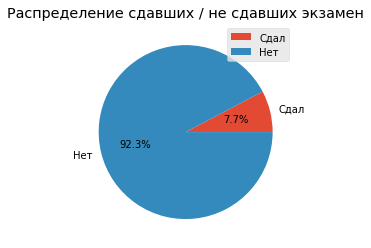

In [274]:
plt.pie(res, labels = ['Сдал', 'Нет'], autopct='%1.1f%%')
plt.title('Распределение сдавших / не сдавших экзамен')
plt.legend(['Сдал', 'Нет'])
plt.show()

## 6.	Постройте гистограмму по распределению баллов за экзамен. Соответствует ли оно нормальному распределению?

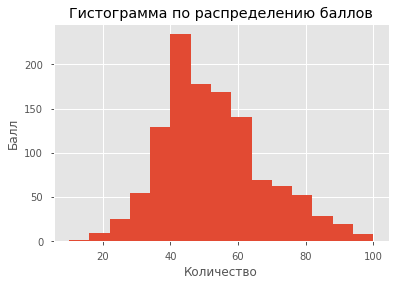

In [275]:
plt.hist(df['Балл'],bins=15)
plt.title('Гистограмма по распределению баллов')
plt.xlabel("Количество")
plt.ylabel("Балл")
plt.show()

__Нормальному распределению ...

## 7.	Постройте оценку ядерной плотности распределению баллов за экзамен

In [276]:
# import seaborn as sns
# sns.kdeplot(dt.SKU_count, shade=True, color="r")

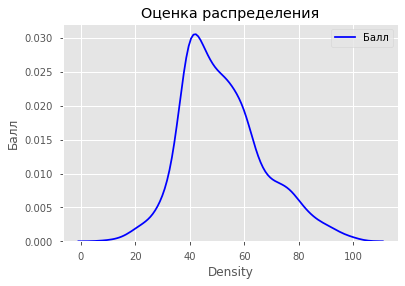

In [277]:
import seaborn as sns
sns.kdeplot(df['Балл'], color="b")
plt.xlabel("Density")
plt.ylabel("Балл")
plt.title("Оценка распределения")
plt.show()

## 8.	Найдите процентное соотношение учащихся, сдавших экзамен на «отлично», «хорошо», «удовлетворительно», «неудовлетворительно». Сделайте графическое представление данного распределения

In [278]:
# 0-35
# 36-50
# 51-75
# 76

In [279]:
r2 = df[df['Балл']<=35].shape[0]*100 / df.shape[0]
r2

7.705334462320068

In [280]:
r3 = df[df['Балл']<=50].shape[0]*100 / df.shape[0] -r2
r3

42.67569856054192

In [281]:
r4 = df[df['Балл']<=75].shape[0]*100 / df.shape[0] -r3 - r2
r4

40.47417442845047

In [282]:
r5 = df[df['Балл']>=76].shape[0]*100 / df.shape[0]
r5

9.144792548687553

In [283]:
matplotlib.style.use('seaborn-notebook')

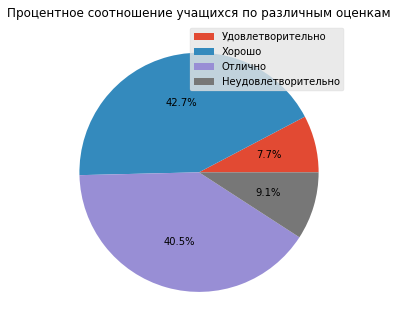

In [284]:
plt.pie([r2, r3, r4, r5], autopct='%1.1f%%')
plt.legend(['Удовлетворительно', 'Хорошо', 'Отлично', 'Неудовлетворительно'])
plt.title('Процентное соотношение учащихся по различным оценкам')
plt.show()

## 9.	Постройте «ящиковые диаграммы», сравнивающие баллы учащихся, сдавших экзамен на «отлично», «хорошо», «удовлетворительно», «неудовлетворительно»

In [285]:
d_r2 = df[df['Балл']<=35]['Балл']
d_r2

0     10.0
1     14.0
2     17.0
3     17.0
4     17.0
      ... 
86    33.0
87    33.0
88    33.0
89    33.0
90    33.0
Name: Балл, Length: 91, dtype: float64

In [286]:
d_r3 = df[(df['Балл']>35) & (df['Балл']<=50)]['Балл']

In [287]:
d_r4 = df[(df['Балл']>50) & (df['Балл']<=75)]['Балл']

In [288]:
d_r5 = df[df['Балл']>=76]['Балл']

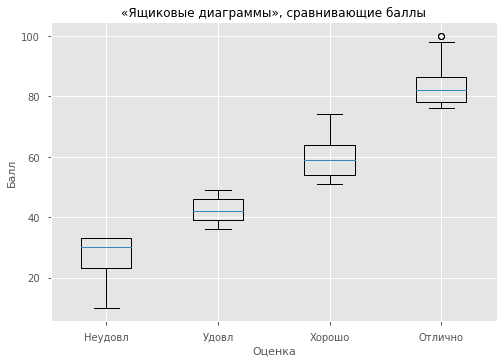

In [289]:
plt.boxplot([d_r2, d_r3, d_r4, d_r5], labels = ['Неудовл', 'Удовл', 'Хорошо', 'Отлично'])
plt.title('«Ящиковые диаграммы», сравнивающие баллы')
plt.xlabel("Оценка")
plt.ylabel("Балл")



plt.show()

## 10.	Какое процентное соотношение юношей и девушек писало данный экзамен? Представьте графически

In [290]:
m = df[df['Пол']=='М'].shape[0] *100 / df.shape[0]
w = df[df['Пол']=='Ж'].shape[0] *100 / df.shape[0]

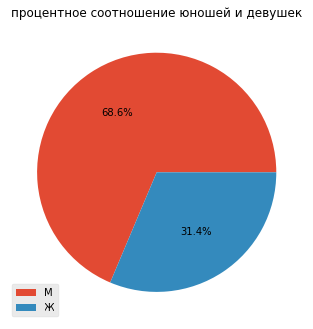

In [291]:
plt.pie([m,w], autopct='%1.1f%%')
plt.title('процентное соотношение юношей и девушек')
plt.legend(['М', 'Ж'])
plt.show()

## 11.	Постройте диаграмму рассеивания, позволяющую увидеть средние баллы девушек и юношей

In [292]:
# scatter

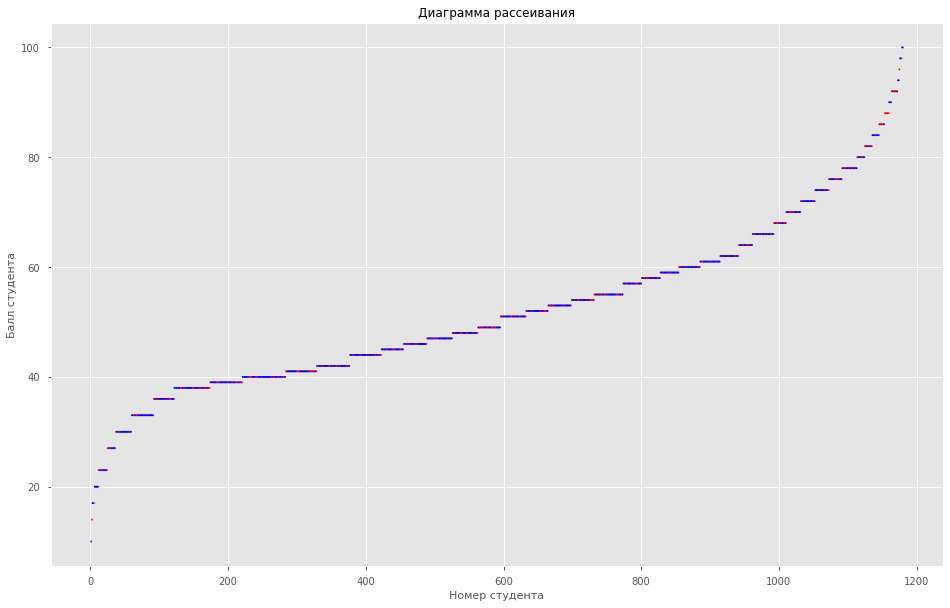

In [293]:
plt.figure(figsize=(16, 10))
ax = plt.scatter(df['№'], df['Балл'], c=np.where(df['Пол']=='М', 'blue', 'red'), s=2)
# plt.legend(['Девушки', 'Юноши'])
plt.title('Диаграмма рассеивания')
plt.xlabel("Номер студента")
plt.ylabel("Балл студента")
plt.show()

In [294]:
# цел

## 12.	Сколько школ (код ППЕ) принимало участие в экзамене?

In [295]:
sp_s = df['№ школы'].unique()
sp_s

array([ 152.,  140.,  137.,  148.,  153.,  144.,  111.,  126.,  128.,
        117.,  138.,  146.,  133.,  114.,  115.,  132.,  147.,  130.,
       1106.,   nan])

In [296]:
sp_s = list(filter(lambda x: not np.isnan(x), sp_s))
print(f'{len(sp_s)} школ принимало участие')
sp_s.sort()

19 школ принимало участие


In [297]:
sp_s = list(map(int, sp_s))
sp_s

[111,
 114,
 115,
 117,
 126,
 128,
 130,
 132,
 133,
 137,
 138,
 140,
 144,
 146,
 147,
 148,
 152,
 153,
 1106]

## 13.	Постройте диаграмму, позволяющую сравнить средние баллы за экзамен по школам. Если какие-нибудь выбросы?

In [298]:
it = []
for sch in sp_s:
    diap = df[df['№ школы']==sch]['Балл']
    it.append(diap)

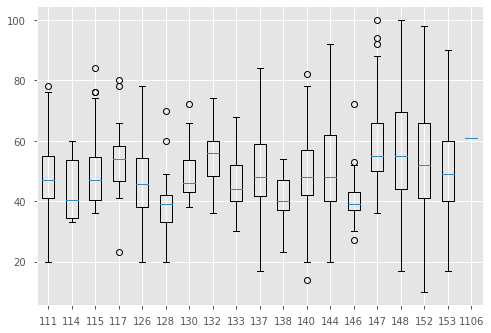

In [299]:
plt.boxplot([el for el in it], labels = sp_s)
plt.show()

Да, выбросы имеются, например в .... школе сильно выделяется ученик, набравший ... балла. В других школах также имеются выбросы

# __Повышенной сложности:__

## 1.	Сколько всего заданий с кратким ответом? С развернутым ответом?

In [300]:
str_sh = df['Задания с кратким ответом'][0]
res_sh = [char for char in str_sh]
count_short = len(res_sh)
print(f'Всего {count_short} заданий с кратким ответом ')

Всего 27 заданий с кратким ответом 


In [301]:
str_long = df['Задания с развёрнутым ответом'][0]
res_pr = [char for char in str_long]
res_long = list(filter(lambda x: x=='(', res_pr))
count_long = len(res_long)
print(f'Всего {count_long} заданий с развернутым ответом ')

Всего 5 заданий с развернутым ответом 


## 2.	Пусть задания с кратким ответом будут задания типа В. Соответственно всего по экзамену вопросов класса В: В1 … Вк  Посчитайте процент выполненных и невыполненных заданий по каждому вопросу класса В. Постройте гистограмму, позволяю щую увидеть данное распределение. Какие есть выпады по данному распределению?

In [302]:
global count_short
global count_long

In [303]:
df_short = pd.DataFrame(df['Задания с кратким ответом'].dropna())
df_long = pd.DataFrame(df['Задания с развёрнутым ответом'].dropna())

In [304]:
labels_b = [f'B{i}' for i in range(1,28)]
labels_c = [f'C{i}' for i in range(1,6)]

In [305]:
def add_col(df_w, par):
    if par == 'B': 
        for num in range(count_short):
            df_w[f'B{num+1}'] = df_w['Задания с кратким ответом'].str[num]
    
    elif par == 'C':
        sp_p = [ i for i in range(0, 20, 4)]
        for num in range(len(sp_p)):
            df_w[f'C{num+1}'] = df_w['Задания с развёрнутым ответом'].str[sp_p[num]]
    

In [306]:
def count_b(df_w):
    res_count_data_b = []
    
    for number in range(1,28):
    
        if df_w[f'B{number}'].iloc[0] in ['+', '-']:
            mas_no = round(df_w[df_w[f'B{number}']=='-'].shape[0]*100 / df_w.shape[0])
            mas_yes = 100-mas_no
            res_count_data_b.append([mas_yes, mas_no])

        else:
            mas_no = round(df_w[df_short[f'B{number}']=='0'].shape[0]*100 / df_w.shape[0])
            mas_yes = 100-mas_no
            res_count_data_b.append([mas_yes, mas_no])
    
    res_count_data_b = np.array(res_count_data_b)
    res_count_data_b = res_count_data_b.T
            
    return res_count_data_b

In [307]:
def count_c(df_w):
    res_count_data_c = []
    
    for number in range(1,6):
    
        mas_no = round(df_w[df_w[f'C{number}']=='0'].shape[0]*100 / df_w.shape[0])
        mas_yes = 100 - mas_no
        res_count_data_c.append([mas_yes, mas_no])
        
    res_count_data_c = np.array(res_count_data_c)
    res_count_data_c = res_count_data_c.T
    
    return res_count_data_c

In [308]:
add_col(df_short, 'B')
add_col(df_long, 'C')

In [309]:
res_count_data_b = count_b(df_short)
res_count_data_c = count_c(df_long)
res_count_data_b, res_count_data_c

(array([[85, 87, 62, 44, 83, 83, 81, 66, 74, 35, 84, 75, 57, 51, 43, 82,
         67, 61, 82, 75, 79, 51, 62, 96, 30, 37, 30],
        [15, 13, 38, 56, 17, 17, 19, 34, 26, 65, 16, 25, 43, 49, 57, 18,
         33, 39, 18, 25, 21, 49, 38,  4, 70, 63, 70]]),
 array([[18, 38, 16, 23, 32],
        [82, 62, 84, 77, 68]]))

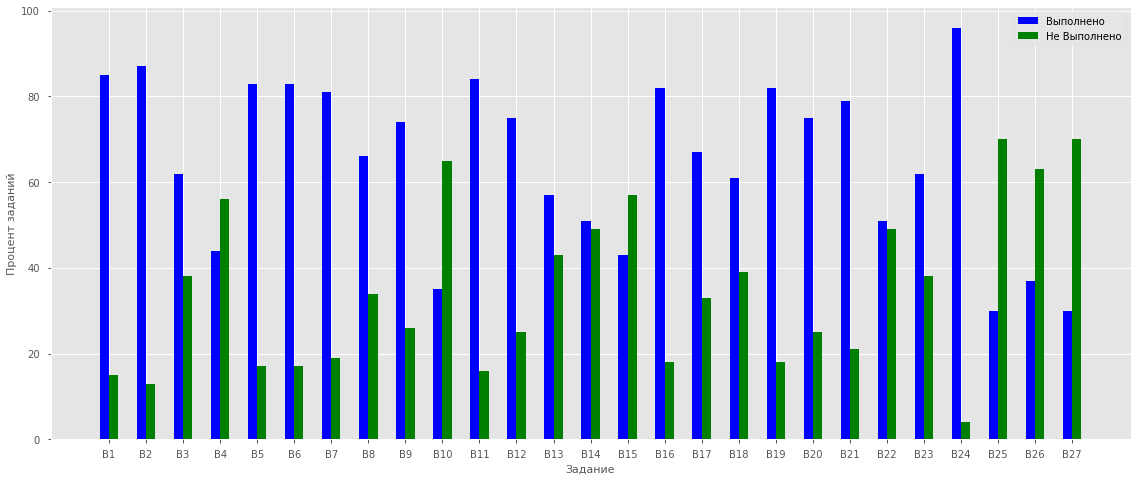

In [332]:
X = np.arange(count_short)
fig = plt.figure(figsize=(15, 6))
ax = fig.add_axes([0,0,1,1])


ax.bar(X + 0.00, res_count_data_b[0], color = 'b', width = 0.25, tick_label= labels_b, align='edge')
ax.bar(X + 0.25, res_count_data_b[1], color = 'g', width = 0.25,  tick_label= labels_b, align='edge')
ax.legend(labels=['Выполнено', 'Не Выполнено'])
ax.set_ylabel('Процент заданий')
ax.set_xlabel('Задание')
plt.show()

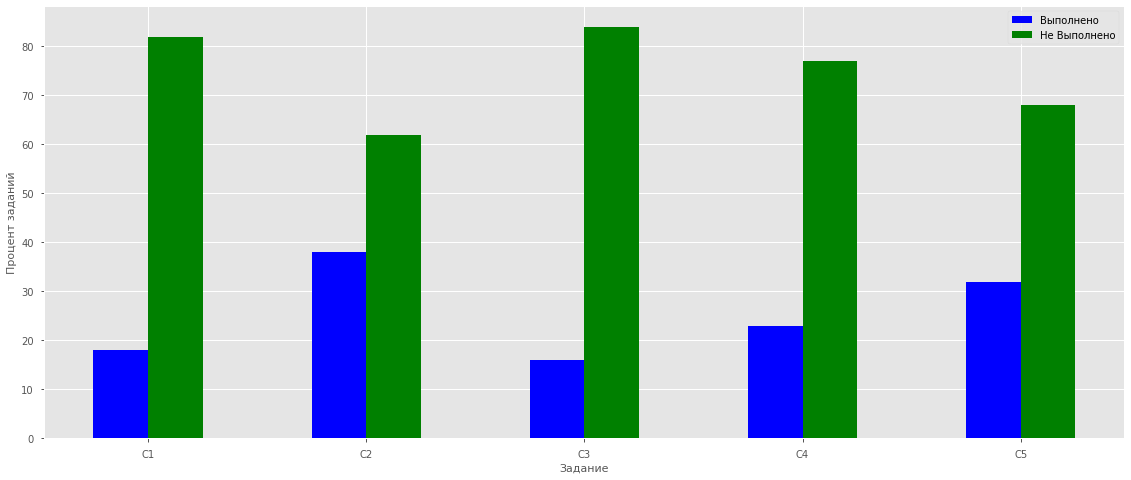

In [331]:
X = np.arange(count_long)
fig = plt.figure(figsize=(15, 6))
ax = fig.add_axes([0,0,1,1])


ax.bar(X + 0.00, res_count_data_c[0], color = 'b', width = 0.25, tick_label= labels_c, align='edge')
ax.bar(X + 0.25, res_count_data_c[1], color = 'g', width = 0.25,  tick_label= labels_c, align='edge')
ax.legend(labels=['Выполнено', 'Не Выполнено'])
ax.set_ylabel('Процент заданий')
ax.set_xlabel('Задание')
plt.show()

Из явных выпадов видно, что с заданием B24 справилось подавляющее большинство сдававших

## 3.	Аналогично и с типом С (ответы с развернутым ответом)

In [312]:
# сделано в пункте 2

Явных выпадов не видно, но можно заметить, что с C2 справляется больше людей, чем с остальными задачами

## 4.	Сделайте анализ по двум школам:
* А) по всем выполненным заданиям типа В
* Б) по заданиям типа С больше 50%
* В) по среднему балу юношей и девушек


In [313]:
first_school, second_school = 140, 153

In [314]:
df_140 = df[df['№ школы']==first_school][['№ школы', 'Задания с кратким ответом', 'Задания с развёрнутым ответом', 'Балл', 'Пол']]
df_153 = df[df['№ школы']==second_school][['№ школы', 'Задания с кратким ответом', 'Задания с развёрнутым ответом', 'Балл', 'Пол']]


In [315]:
add_col(df_140, 'B')
add_col(df_153, 'B')

In [316]:
res_count_data_b_140 = count_b(df_140)
res_count_data_b_153 = count_b(df_153)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':


In [317]:
res_count_data_b_140[0], res_count_data_b_153[0]

(array([87, 88, 69, 40, 84, 81, 76, 67, 83, 30, 83, 84, 57, 51, 34, 74, 67,
        54, 81, 73, 79, 49, 61, 96, 30, 34, 29]),
 array([80, 89, 65, 50, 84, 79, 80, 74, 68, 33, 87, 67, 53, 49, 42, 81, 63,
        52, 74, 80, 78, 44, 59, 95, 33, 32, 27]))

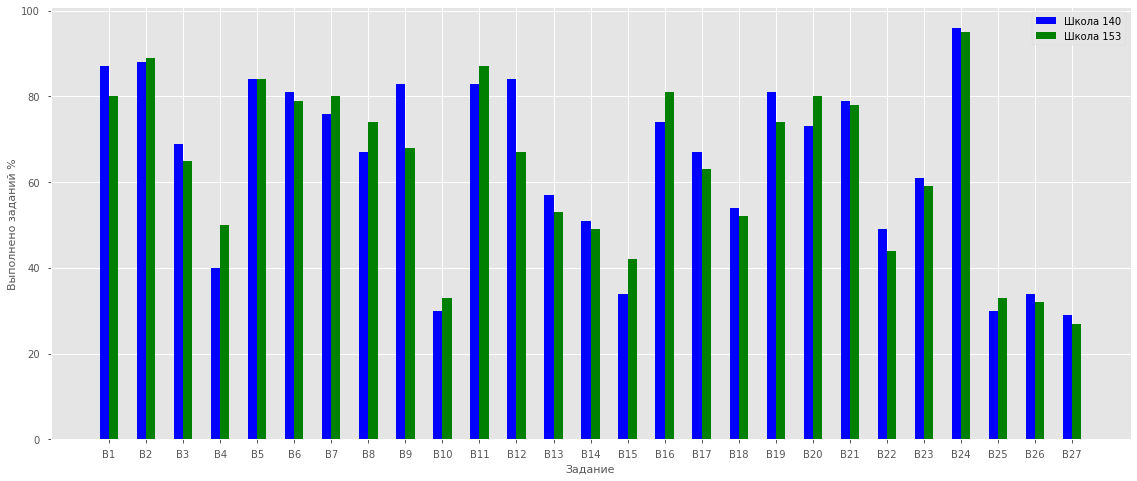

In [329]:
X = np.arange(count_short)
fig = plt.figure(figsize=(15, 6))
ax = fig.add_axes([0,0,1,1])


ax.bar(X + 0.00, res_count_data_b_140[0], color = 'b', width = 0.25, tick_label= labels_b, align='edge')
ax.bar(X + 0.25, res_count_data_b_153[0], color = 'g', width = 0.25,  tick_label= labels_b, align='edge')
ax.legend(labels=['Школа 140', 'Школа 153'])
ax.set_ylabel('Выполнено заданий %')
ax.set_xlabel('Задание')
plt.show()

### Б) по заданиям типа С больше 50%

In [319]:
add_col(df_140, 'C')
add_col(df_153, 'C')

In [320]:
df_140.head(2)

,№ школы,Задания с кратким ответом,Задания с развёрнутым ответом,Балл,Пол,B1,B2,B3,B4,B5,...,B23,B24,B25,B26,B27,C1,C2,C3,C4,C5
1,140.0,----100---01-+-000--0--1---,0(3)0(3)0(3)0(3)0(3),14.0,Ж,-,-,-,-,1,...,-,1,-,-,-,0,0,0,0,0
10,140.0,-+--100---10---010--1--1---,0(3)0(3)0(3)0(3)0(3),20.0,М,-,+,-,-,1,...,-,1,-,-,-,0,0,0,0,0


In [321]:
def count_c_50(df_w):
    res_count_data_c = []
    
    for number in range(1,6):
    
        mas_2 = round(df_w[df_w[f'C{number}']=='2'].shape[0]*100 / df_w.shape[0])
        mas_3 = round(df_w[df_w[f'C{number}']=='3'].shape[0]*100 / df_w.shape[0])
        res_count_data_c.append(mas_2+mas_3)
    
    return res_count_data_c

In [322]:
res_count_data_c_140 = count_c_50(df_140)
res_count_data_c_153 = count_c_50(df_153)

In [323]:
res_count_data_c_140, res_count_data_c_153

([3, 17, 4, 0, 6], [5, 20, 9, 4, 13])

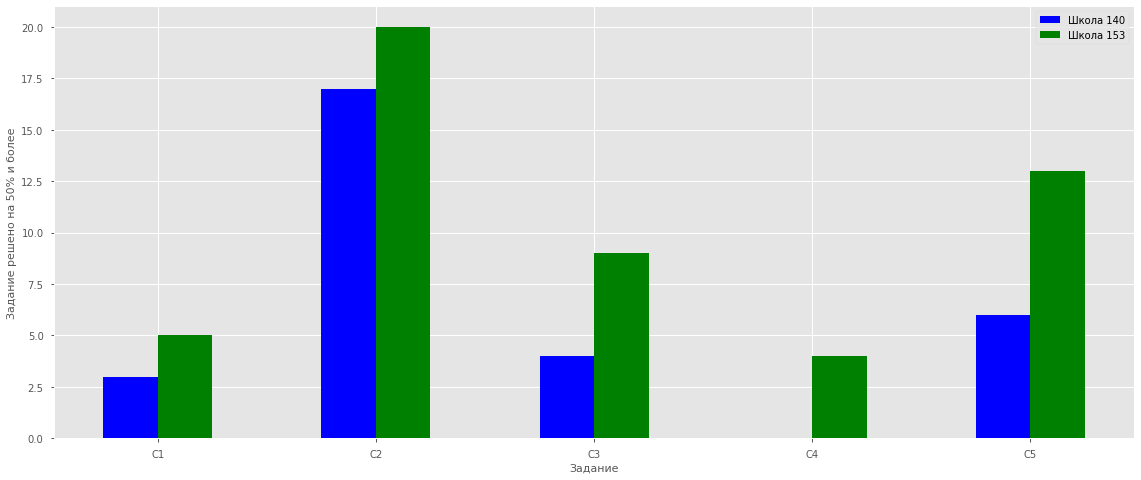

In [328]:
X = np.arange(count_long)
fig = plt.figure(figsize=(15, 6))
ax = fig.add_axes([0,0,1,1])


ax.bar(X + 0.00, res_count_data_c_140, color = 'b', width = 0.25, tick_label= labels_c, align='edge')
ax.bar(X + 0.25, res_count_data_c_153, color = 'g', width = 0.25,  tick_label= labels_c, align='edge')
ax.legend(labels=['Школа 140', 'Школа 153'])
ax.set_ylabel('Задание решено на 50% и более')
ax.set_xlabel('Задание')
plt.show()

В школе №140 никто не решил С4 более, чем на 50%

### в) по среднему балу юношей и девушек

In [325]:
res_140 = df_140.groupby('Пол')['Балл'].mean()
res_153 = df_153.groupby('Пол')['Балл'].mean()

In [326]:
list_res_140 = list(res_140)
list_res_153 = list(res_153)

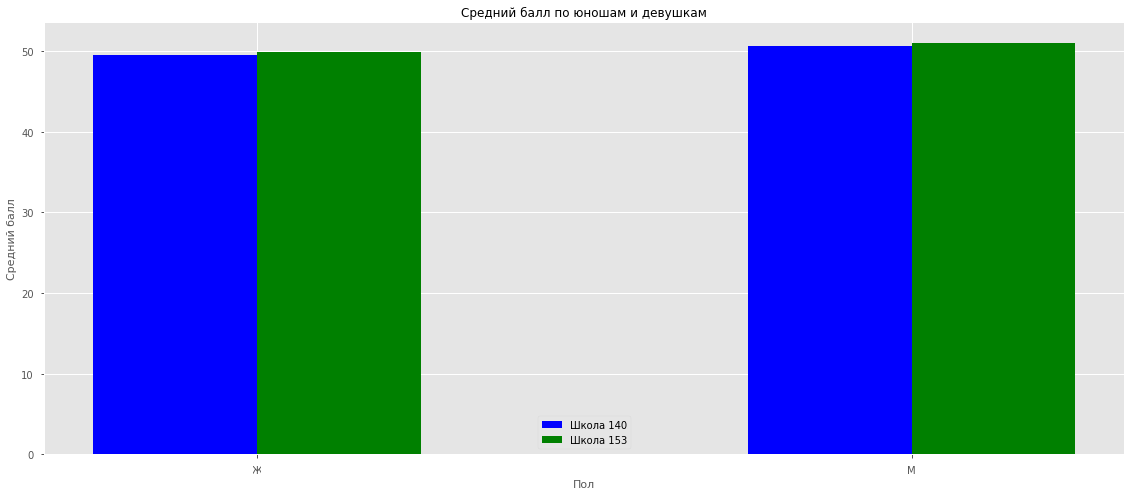

In [327]:
X = np.arange(2)
fig = plt.figure(figsize=(15, 6))
ax = fig.add_axes([0,0,1,1])


ax.bar(X + 0.00, list_res_140, color = 'b', width = 0.25, tick_label= ['Ж', 'М'], align='edge')
ax.bar(X + 0.25, list_res_153, color = 'g', width = 0.25,  tick_label= ['Ж', 'М'], align='edge')
ax.legend(labels=['Школа 140', 'Школа 153'])
ax.set_ylabel('Средний балл')
ax.set_xlabel('Пол')
plt.title('Средний балл по юношам и девушкам')
plt.show()
